In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import logging

logging.basicConfig(level=logging.INFO)

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))



In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from gfl.gfl import *

In [3]:
T = 50
p = 3

In [4]:
np.random.seed(1)

In [5]:
Y1 = np.concatenate(
    (
        np.random.normal(20, size=int(T/5)), 
        np.random.normal(1, size=int(T/2)),
        np.random.normal(3, size=T - int(T/2)-int(T/5))
    )
)


Y2 = np.concatenate(
    (
        np.random.normal(6, size=int(T/5)), 
        np.random.normal(15, size=int(T/2)),
        np.random.normal(30, size=T - int(T/2)-int(T/5))
    )
)

Y3 = np.concatenate(
    (
        np.random.normal(30, size=int(T/4)), 
        np.random.normal(8, size=int(T/2)),
        np.random.normal(4, size=T - int(T/2)-int(T/4))
    )
)

In [6]:
Y = np.column_stack((Y1, Y2, Y3))

In [7]:
Y.shape

(50, 3)

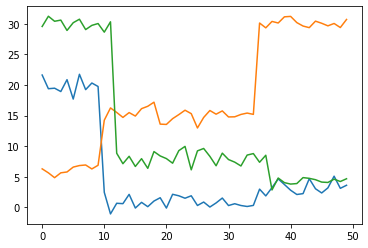

In [8]:
plt.plot(Y);

# GLF method

In [9]:
# beta = np.array(
#     [[ -6.0745,   40.1046,  -12.4790],
#      [ 5.8884 ,   8.1235 ,   4.1614],
#      [ 0.9460 ,   1.5141 ,   1.4289],
#      [-0.0147  ,  1.6391 ,  -1.2194]]
# )

In [10]:
# active_set = np.array([35,10,12,37]).reshape(-1,1)

In [11]:
# active_set[[True, False, True, False]]

In [12]:
res = gflasso(Y, lams=[10])

INFO:root:[optimize] Iteration 1
 beta:
 [[0. 0. 0.]] 
 active_set:
 [[11]]
 Obj: 5816.877532180895 
-----------------------------------
INFO:root:[optimize] Iteration 2
 beta:
 [[-40.14725913  35.99786835 -62.44868151]
 [  0.           0.           0.        ]] 
 active_set:
 [[11]
 [34]]
 Obj: 1861.2688162324966 
-----------------------------------
INFO:root:[optimize] Iteration 3
 beta:
 [[-41.09014356  23.03010739 -58.2136045 ]
 [  4.25179762  38.74949486 -10.95478641]
 [  0.           0.           0.        ]] 
 active_set:
 [[11]
 [34]
 [ 9]]
 Obj: 913.7990776849847 
-----------------------------------
INFO:root:[optimize] Iteration 4
 beta:
 [[-15.50660144   9.8685815  -40.4476331 ]
 [  4.91010821  38.44689483 -11.38911677]
 [-31.26993458  15.87741969 -18.2925996 ]
 [  0.           0.           0.        ]] 
 active_set:
 [[11]
 [34]
 [ 9]
 [36]]
 Obj: 671.55991125444 
-----------------------------------
INFO:root:Optimality conditions are met!!!
INFO:root:[optimize] Iteration 5

# Test

In [43]:
T, p = Y.shape
# mean_signal = np.mean(Y, axis=0)
w = default_weights(T)
# Compute C = X'*Y
C = left_multiply_by_xt(Y, w)

In [44]:
beta = []
active_set = []
lam = 10
xty = C.copy()
y = Y.copy()
solved = False
n = 50

In [46]:
res = optimize(beta, active_set, lam, xty, y, w, verbose=1)

INFO:root:[optimize] Iteration 1
 beta:
 [[0. 0. 0.]] 
 active_set:
 [[11]]
 Obj: 5816.877532180895 
-----------------------------------
INFO:root:[optimize] Iteration 2
 beta:
 [[-40.14725913  35.99786835 -62.44868151]
 [  0.           0.           0.        ]] 
 active_set:
 [[11]
 [34]]
 Obj: 1861.2688162324966 
-----------------------------------
INFO:root:[optimize] Iteration 3
 beta:
 [[-41.09014356  23.03010739 -58.2136045 ]
 [  4.25179762  38.74949486 -10.95478641]
 [  0.           0.           0.        ]] 
 active_set:
 [[11]
 [34]
 [ 9]]
 Obj: 913.7990776849847 
-----------------------------------
INFO:root:[optimize] Iteration 4
 beta:
 [[-15.50660144   9.8685815  -40.4476331 ]
 [  4.91010821  38.44689483 -11.38911677]
 [-31.26993458  15.87741969 -18.2925996 ]
 [  0.           0.           0.        ]] 
 active_set:
 [[11]
 [34]
 [ 9]
 [36]]
 Obj: 671.55991125444 
-----------------------------------
INFO:root:Amazing!!!
INFO:root:[optimize] Iteration 5
 beta:
 [[-15.5056817

# Optimize current lambda with a warm restart from the previous lambda
 